# Reporte 10 : 

## Nombre: Mayeli Charra Huaman 
## Codigo: 20200275

# Parte 1: Reporte 

En el artículo “¿Quién se vuelve inventor en Estados Unidos? La importancia de la exposición a la innovación” por los autores Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. (2019) quienes se plantean si existen factores que influyen en la innovación que no son tomados en cuenta, puesto que otras investigaciones se centran en el estudio de “habilidades naturales". De esa manera las preguntas de investigación que surgen en torno a ¿Cuáles son los factores como clase social, raza o género determinantes para ser un inventor? ¿Es probable que las infancias que se trasladan a áreas de alta innovación se vuelvan mejores inventores? Entonces sugieren en general la hipótesis de que la exposición de los niños a figuras inventoras resulta importante para el desarrollo de futuros inventores. 

Entre las fortalezas del artículo encontramos que en cuanto a su metodología realiza 3 análisis diferentes. En primer lugar, realizan comparaciones de cómo convertirse en inventores según características que mediante un algoritmo de emparejamiento por el ingreso y los resultados de test de matemáticas.  En segundo lugar, se realizan comparaciones en torno a características para determinar si explican la brecha de innovación. Donde se usó un modelo intergeneracional que mide qué tan alejada está la invención del entorno de los niños. En tercer lugar, realizan una regresiòn con efectos fijos sobre el vecindario en el nivel de innovación. 

Por otro lado se hacen presentes algunas debilidades que la investigación se centra solo en factores de la exposición donde se esperan los resultado a largo plazo es decir a una edad adulta y no toma otros factores a corto plazo y en específico sobre el proceso de innovar que puedan explicar la razón por las que los niños terminan volviendose o no inventores, tanto a falta de oportunidades económicas o académicas que no estén relacionadas que tampoco tienen relación con “habilidades naturales”.  Por ello se podría buscar otras variables relacionadas que no se reflejen necesariamente en patentes. 

La contribución del artículo en cuanto al tema es relevante pues explora las condiciones en las que es posible hablar de factores que determinan quien se convierte en inventor basándonos en la vida de los inventores en EEUU. Es así que los autores se centran en explorar las variaciones dentro de las clases de tecnología donde los niños son propensos a inventar en cierta área al crecer con padres, compañeros de trabajo de los padres, o vecinos que inventan.  En primer lugar, en cuanto a brechas de innovación por características de nacimiento se encontró que la probabilidad de convertirse en inventor es mayor para cuyos padres tienen altos ingresos, también que las diferencias étnicas son favorables para los asiáticos y blancos. A su vez el porcentaje de mujeres inventoras ha crecido de manera sostenida pero baja. En segundo lugar, en cuanto al entorno infantil y exposición  a la innovación, los niños con padres inventores o compañeros de los padres son más probable a ser inventores ellos mismos. Ello debido a que los canales de transmisión de capital humano específico, acceso a redes para seguir la innovación en determinado campo y adquisición de información sobre determinadas carreras. Por otra parte, encontraron que es más probable que las mujeres innoven en cierta categoría si hay más mujeres como referencia que lo hicieron en el área donde crecieron. En cuanto a los efectos del vecindario, que la exposición impacta sustancialmente en los tipos de innovación como si se convierten o no en inventores.  Por último en cuanto a los “Einstein perdidos” encontraron que las probabilidad de ser inventores es tan sensible a sus condiciones al nacer por lo que hay muchas personas que no siguen una carrera en innovación a pesar de que hubieran tenido la capacidad innata para hacerlo. 


A modo de cierre, los próximos pasos a tomar para la investigación es profundizar en otros factores, respecto al corto plazo como incentivos financieros, las barreras de admisión a la educación STEM. En esa línea se sugiere la posibilidad de replicar la investigación para países en vías de desarrollo y conocer si se cumple la hipótesis. A su vez, evaluar el impacto de políticas como programas destinados a incentivar la innovación de este modo encontramos trabajos recientes como el de [Bloom, N., Reenen, J.,& Williams, H.(2019)](https://www.aeaweb.org/articles?id=10.1257/jep.33.3.16)que explora las políticas para promover la innovación y describen la evidencia disponible sobre su efectividad. Este trabajo sintetiza así la evidencia sobre las políticas en términos de calidad e implicancias de las políticas en general desde una perspectiva de costo-beneficio social. De esta manera se exploran variables relacionadas a las políticas de innovación que permiten explorar a corto plazo quienes se vuelven inventores y porque otros no. 


Bibliografía 

Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics, 134(2), 647-713.

Bloom, Nicholas, John Van Reenen, and Heidi Williams. (2019). "A Toolkit of Policies to Promote Innovation." Journal of Economic Perspectives, 33 (3): 163-84.



# Parte 2: Código en Python
Código hecho por Karen Arevalo y Mayeli Charra 


In [ ]:
!pip install causalgraphicalmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

### Regresión Discontinua
En esta sección, puede guiarse del siguiente bookdown.
- Explique de manera muy breve y resumida en qué consiste una regresión discontinua.

La regresión discontinua tiene como objetivo determinar los efectos causales de intervenciones al asignar puntos cut-off o punto de corte por encima o por debajo del punto que se asigna en la intervención. El principal supuesto de este diseño es la continuidad de la variable, ya que cualquier discontinuidad implica alguna causa. 

Se toma en cuenta las siguiente definiciones necesarias para aplicar el método: 
- Variable de ejecucion ($X$) 
- Punto de corte (Cutoff) ($C_0$)
- Ancho de banda ($h$)
- Tratamiento ($D$)

Además, en el gráfico se observa que  la Variable de ejecución es una variable continua. Esta asigna unidades al tratamiento y se basa en una puntuación de "corte" donde si se obtiene una puntuación superior al corte se coloca en el grupo de tratamiento y las unidades inferiores no. 

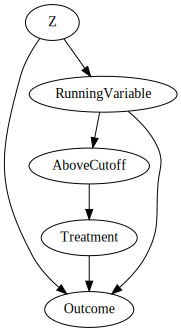

In [ ]:
sprinkler = CausalGraphicalModel(
    nodes=["RunningVariable", "AboveCutoff", "Treatment", "Z", "Outcome"],
    edges=[
        ("Z", "RunningVariable"), 
        ("RunningVariable", "AboveCutoff"), 
        ("RunningVariable", "Outcome"),
        ("AboveCutoff", "Treatment"), 
        ("Z", "Outcome"), 
        ("Treatment", "Outcome")
    ]
)

# draw return a graphviz `dot` object, which jupyter can render
sprinkler.draw()


- Detalle un ejemplo en la vida real en donde podría emplear una regresión discontinua.

Se podría aplicar para evaluar el impacto de la asignación de becas como Beca18 tomando en cuenta un método cuasi experimental de regresión discontinua para estimar los efectos intermedios del programa. Para ello se tomará como referencia los resultados de una convocatoria donde los indicadores relevantes sobre acceso, permanencia, continuidad, deserción. De esa manera se busca afianzar y mejorar los resultados de gestión del programa social que demuestran una contribución significativa a la reducción de la brecha educativa.   [Saavedra,L.(2019)](https://hdl.handle.net/11042/3898) 

- Explique el diseño Sharp Desing y comente un ejemplo en la vida real en donde podría aplicarlo (sea lo más detallado posible).

En la Discontinuidad de la Regresión, se aceptan dos tipos de estudios RDD. Hay diseños en los que la probabilidad de tratamiento pasa de 0 a 1 en el punto de corte, (diseño "sharp"). Es decir, la regla de asignación se cumple de manera determinista. Donde, los individuos elegibles bajo ninguna circunstancia cambian o afectan esta asignación. Además el efecto se puede conocer con una comparación de medias.

Por ejemplo, este diseño podría ser aplicable para probar que los programas de recuperación universitaria ayuden a mejorar la  persistencia y rendimiento de los estudiantes. Para en este caso estimar los efectos causales, es posible usar un diseño de regresión discontinua sharp de modo que es posible explorar la asignación de los estudiantes a la recuperación. Aunque se use el metodo sharp y no haya una forma directa de comprobar que los indiviudos tengan control sobre la asignación, para probar la validez de la asignación se toma los supuestos del diseño donde si la distribución de la varaible asignación presenta alguna discontinuidad en el punto de corte.     [Duchini, E. (2017).](https://www.sciencedirect.com/science/article/abs/pii/S0272775716304605)

Formalmente el diseño Sharp se representa como:
$$
D_i =
   \begin{cases} 1
       \text{si} & X_i\geq{c_0}
       \\ 0
       \text{ if } & X_i < c_0
   \end{cases}
$$

### Aplicaciones
Ahora guíese del siguiente script visto en clase.
Siguiendo todo el apartado Simulated Data, trabaje con la siguiente ecuación, según sea su caso, y replique los resultados correspondientes, incluidos los gráficos respectivos.

* Ecuaciones:

1. $ Y= 15 + 22D + 2.5X + e $

2. $ Y= 12 + 60D + 1.3X + e$

* Graficando ecuación 1

In [ ]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

Visualmente hay un aumento del punto de corte

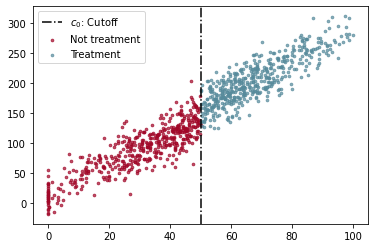

In [ ]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

Ahora estimamos un modelo para cada lado, en este caso el modelo que mejor se ajustaría sería el modelo lineal, para ello generamos una función para incluir las predicciones en la base de datos.

In [ ]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

Predicciones

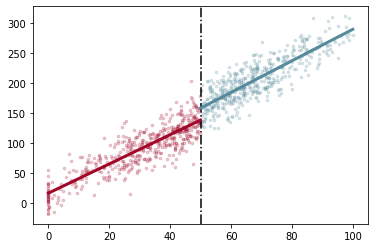

In [ ]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

* Encontrando el efecto Salto de la ecuación 1 y ploteando

Para medir el salto (Efecto), para este caso sólo nos centraremos en la última observación prevista para el lado izquierdo y en la primera prevista para el lado izquierdo, ya que allí se observa un salto.

In [ ]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 20.02


Visualmente podemos ver el efecto en el punto de corte, recuerda que el efecto real es de 24 unidades

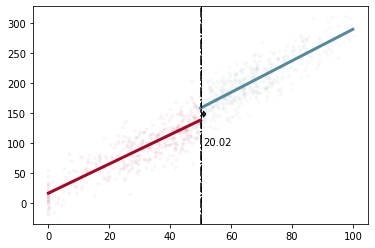

In [ ]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));

* Graficando la ecuación 2

In [ ]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 12 + 60*dat.D + 1.3 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

Visualmente hay un aumento en el punto de corte

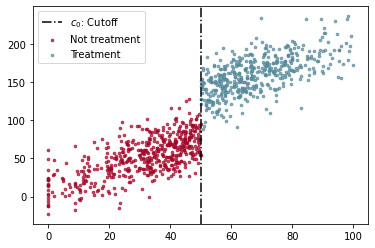

In [ ]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

Ahora estimamos un modelo para cada lado, en este caso el modelo que mejor se ajustaría sería el modelo lineal, para ello generamos una función para incluir las predicciones en la base de datos.

In [ ]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

Predicciones

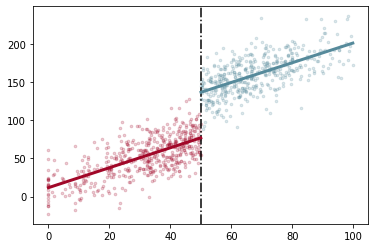

In [ ]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

* Encontrando el efecto Salto de la ecuación 2 y ploteando

In [ ]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 59.8


Visualmente podemos ver el efecto en el punto de corte, recuerda que el efecto real es de 63 unidades

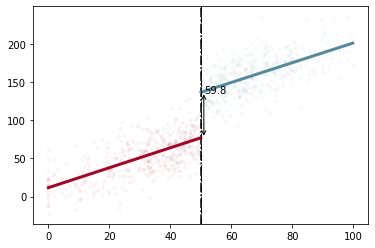

In [ ]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));